In [1]:
import numpy as np
import pandas as pd
import pickle
import os
from os import path

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler, RobustScaler, PowerTransformer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\SAIRAZEX\\Downloads\\FY\\5DAYS.csv')

In [3]:
df = data[data['Label'].isin(['BENIGN', 'DDoS', 'Portscan', 'Web Attack - Brute Force'])]

In [4]:
df.head()

,id,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
0,1,192.168.10.50-192.168.10.3-56108-3268-6,192.168.10.50,56108,192.168.10.3,3268,6,2017-07-07 11:59:50.315195,112740690,32,...,343,1.610540e+07,4.988048e+05,16399772,15375229,-1,-1,112740690,BENIGN,-1
1,2,192.168.10.50-192.168.10.3-42144-389-6,192.168.10.50,42144,192.168.10.3,389,6,2017-07-07 11:59:50.316273,112740560,32,...,285,1.610543e+07,4.987937e+05,16399782,15375263,-1,-1,112740560,BENIGN,-1
2,3,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2017-07-07 12:00:31.388567,113757377,545,...,19,1.221036e+07,6.935824e+06,20757030,5504997,-1,-1,0,BENIGN,-1
3,4,192.168.10.25-224.0.0.251-5353-5353-17,192.168.10.25,5353,224.0.0.251,5353,17,2017-07-07 12:00:42.903850,91997219,388,...,16,1.319764e+07,5.826905e+06,19776791,5817470,-1,-1,0,BENIGN,-1
4,5,192.168.10.25-17.253.14.125-123-123-17,192.168.10.25,123,17.253.14.125,123,17,2017-07-07 12:00:42.430758,66966070,6,...,1968172,6.497443e+07,0.000000e+00,64974431,64974431,-1,-1,0,BENIGN,-1


In [5]:
df.columns

Index(['id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags',
       'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min',
       'Packet Length Max', 'Packet Length

In [6]:
df = df.drop(columns=['id', 'Flow ID', 'Src IP', 'Timestamp', 'Dst IP', 'Attempted Category'])

In [7]:
df.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Varian

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836849 entries, 0 to 2099975
Data columns (total 85 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Src Port                    int64  
 1   Dst Port                    int64  
 2   Protocol                    int64  
 3   Flow Duration               int64  
 4   Total Fwd Packet            int64  
 5   Total Bwd packets           int64  
 6   Total Length of Fwd Packet  int64  
 7   Total Length of Bwd Packet  int64  
 8   Fwd Packet Length Max       int64  
 9   Fwd Packet Length Min       int64  
 10  Fwd Packet Length Mean      float64
 11  Fwd Packet Length Std       float64
 12  Bwd Packet Length Max       int64  
 13  Bwd Packet Length Min       int64  
 14  Bwd Packet Length Mean      float64
 15  Bwd Packet Length Std       float64
 16  Flow Bytes/s                float64
 17  Flow Packets/s              float64
 18  Flow IAT Mean               float64
 19  Flow IAT Std              

In [9]:
df.describe()

C:\Users\SAIRAZEX\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\SAIRAZEX\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time
count,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,...,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06,1.836849e+06
mean,4.856055e+04,1.063280e+03,1.197524e+01,1.361456e+07,1.337952e+01,1.549845e+01,5.887813e+02,2.396955e+04,2.063254e+02,2.423044e+01,...,5.885852e+04,2.316371e+05,9.086122e+04,4.773372e+06,2.472534e+05,4.958500e+06,4.506071e+06,-9.989830e-01,-9.986504e-01,2.997081e+07
std,1.663371e+04,5.406346e+03,5.489260e+00,3.240077e+07,9.305472e+02,1.238106e+03,4.594824e+03,2.809287e+06,5.162257e+02,3.632642e+01,...,4.578068e+05,1.228002e+06,6.803547e+05,1.423821e+07,2.367086e+06,1.467917e+07,1.401535e+07,7.234653e-02,8.612122e-02,3.980494e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,4.381400e+04,5.300000e+01,6.000000e+00,2.520000e+02,2.000000e+00,1.000000e+00,4.800000e+01,1.040000e+02,3.200000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
50%,5.407200e+04,5.300000e+01,1.700000e+01,6.103000e+04,2.000000e+00,2.000000e+00,7.600000e+01,2.040000e+02,4.400000e+01,3.100000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
75%,6.046900e+04,4.430000e+02,1.700000e+01,5.269889e+06,8.000000e+00,6.000000e+00,3.480000e+02,1.492000e+03,1.920000e+02,4.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,5.077012e+06
max,6.553500e+04,6.552900e+04,1.700000e+01,1.200000e+08,2.197590e+05,2.919220e+05,2.429858e+06,6.554523e+08,2.482000e+04,1.472000e+03,...,7.415440e+07,1.100975e+08,1.100975e+08,1.199997e+08,7.691483e+07,1.199997e+08,1.199997e+08,1.000000e+01,1.100000e+01,3.029044e+10


In [10]:
df.describe().T

C:\Users\SAIRAZEX\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\SAIRAZEX\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Src Port,1836849.0,4.856055e+04,1.663371e+04,0.0,43814.0,54072.0,60469.0,6.553500e+04
Dst Port,1836849.0,1.063280e+03,5.406346e+03,0.0,53.0,53.0,443.0,6.552900e+04
Protocol,1836849.0,1.197524e+01,5.489260e+00,0.0,6.0,17.0,17.0,1.700000e+01
Flow Duration,1836849.0,1.361456e+07,3.240077e+07,0.0,252.0,61030.0,5269889.0,1.200000e+08
Total Fwd Packet,1836849.0,1.337952e+01,9.305472e+02,0.0,2.0,2.0,8.0,2.197590e+05
...,...,...,...,...,...,...,...,...
Idle Max,1836849.0,4.958500e+06,1.467917e+07,0.0,0.0,0.0,0.0,1.199997e+08
Idle Min,1836849.0,4.506071e+06,1.401535e+07,0.0,0.0,0.0,0.0,1.199997e+08
ICMP Code,1836849.0,-9.989830e-01,7.234653e-02,-1.0,-1.0,-1.0,-1.0,1.000000e+01
ICMP Type,1836849.0,-9.986504e-01,8.612122e-02,-1.0,-1.0,-1.0,-1.0,1.100000e+01


In [11]:
df.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Varian

In [12]:
df['Label'].value_counts()

Label
BENIGN                      1582566
Portscan                     159066
DDoS                          95144
Web Attack - Brute Force         73
Name: count, dtype: int64

In [13]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [14]:
df.dropna(inplace=True)

In [15]:
print(f"Total duplicate samples in dataset: {df.duplicated().sum()}")

Total duplicate samples in dataset: 12105


In [16]:
df = df.drop_duplicates()

In [17]:
print(f"Total duplicate samples in dataset: {df.duplicated().sum()}")

Total duplicate samples in dataset: 0


In [18]:
df['Label'].value_counts()

Label
BENIGN                      1570468
Portscan                     159059
DDoS                          95144
Web Attack - Brute Force         73
Name: count, dtype: int64

In [19]:
def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    nunique = df.nunique()
    cols_to_plot = df.columns[(nunique>1) & (nunique<50)]
    df_to_plot = df[cols_to_plot]

    n_rows, n_cols = df_to_plot.shape
    col_names = list(df_to_plot.columns)

    n_graph_row = (n_cols + n_graph_per_row - 1) // n_graph_per_row
    plt.figure(num=None, figsize=(6*n_graph_per_row, 8*n_graph_row), dpi=80, facecolor='w', edgecolor='k')

    for i, col_name in enumerate(cols_to_plot[:n_graph_shown]):
        plt.subplot(n_graph_row, n_graph_per_row, i+1)
        column_data = df_to_plot[col_name]

        if not np.issubdtype(type(column_data.iloc[0]), np.number):
            value_counts = column_data.value_counts()
            value_counts.plot.bar()
        else:
            column_data.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{col_name} (column (i))')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

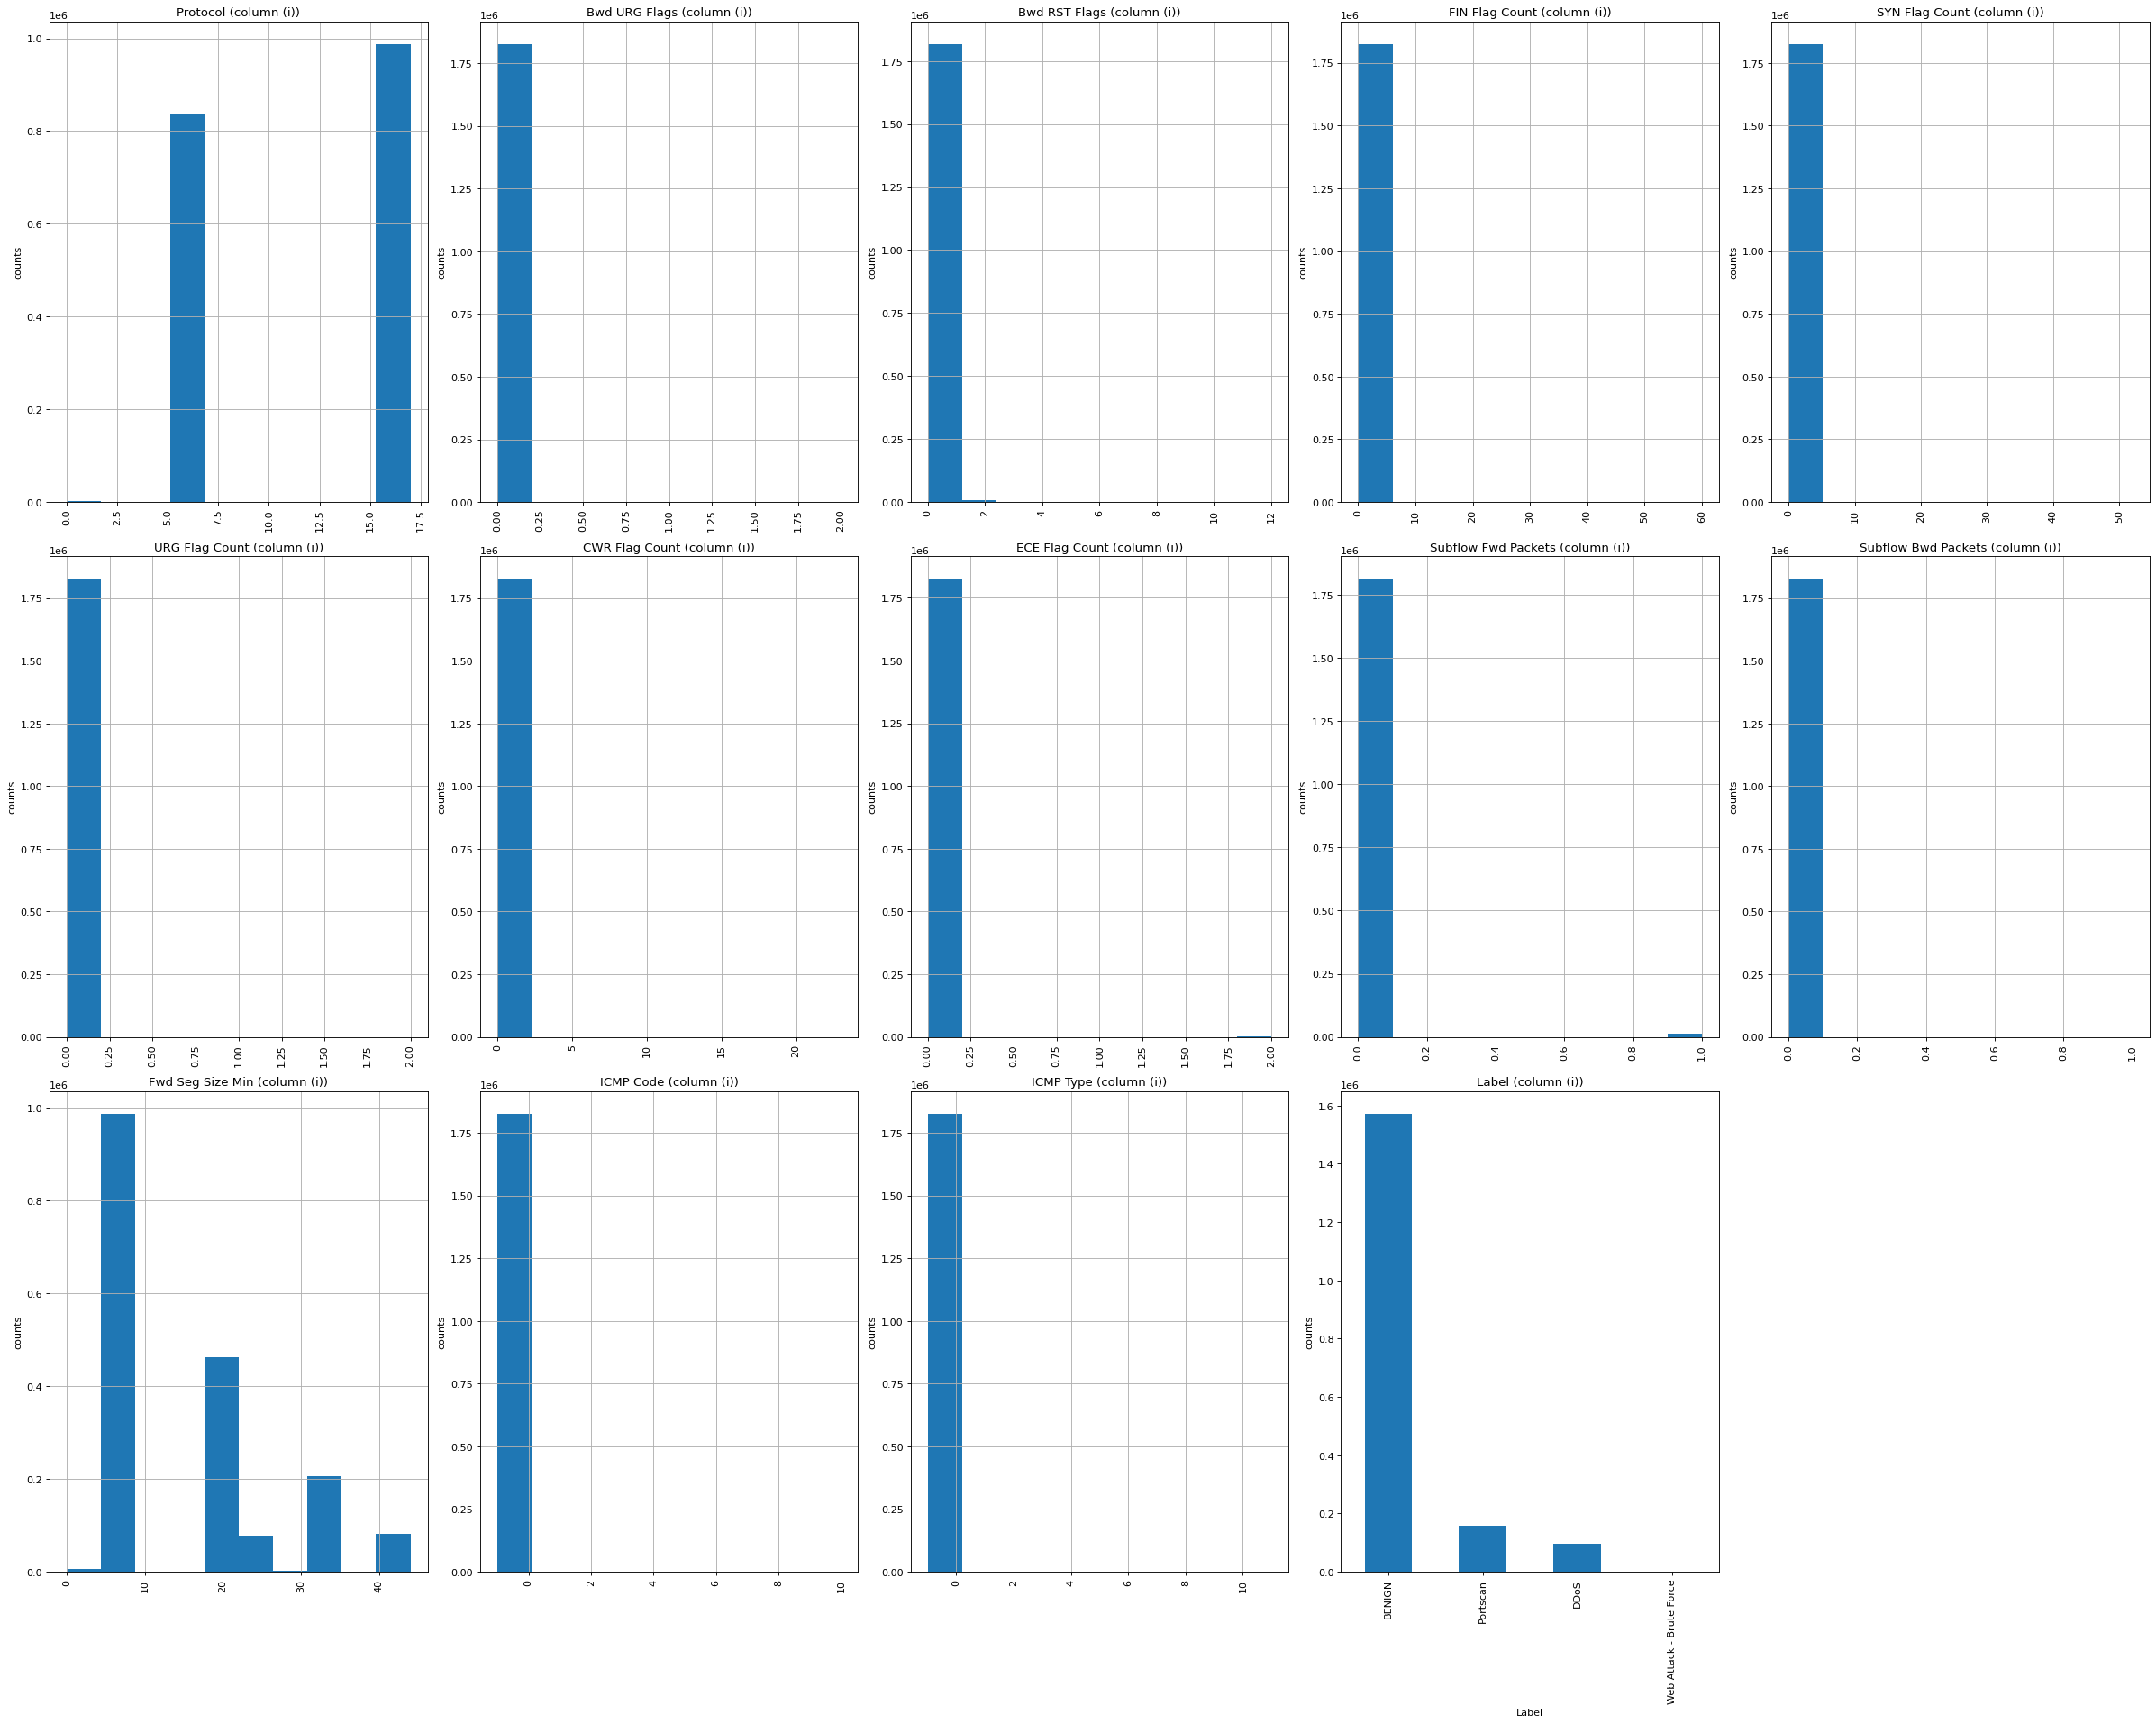

In [20]:
plt.rcParams['figure.figsize'] = (30, 30)
plot_per_column_distribution(df, 79, 5)

In [21]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

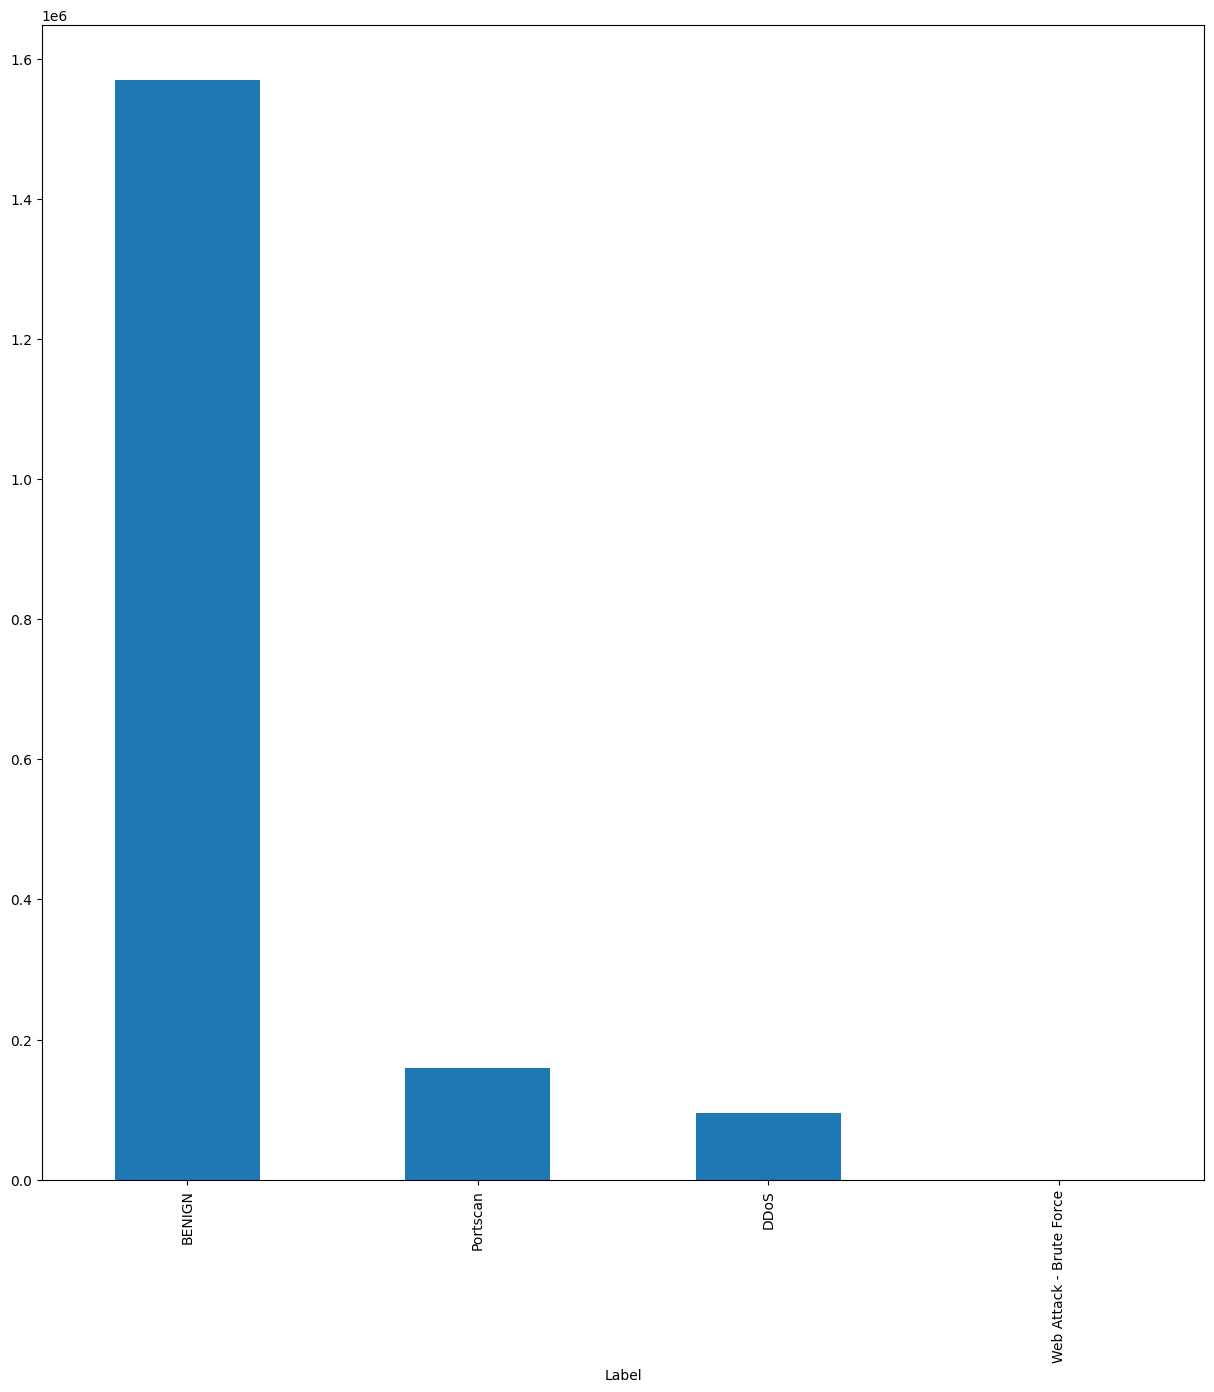

In [22]:
plt.rcParams['figure.figsize'] = (15, 15)
bar_graph("Label")

In [23]:
df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label
0,56108,3268,6,112740690,32,16,6448,1152,403,0,...,380,343,1.610540e+07,4.988048e+05,16399772,15375229,-1,-1,112740690,BENIGN
1,42144,389,6,112740560,32,16,6448,5056,403,0,...,330,285,1.610543e+07,4.987937e+05,16399782,15375263,-1,-1,112740560,BENIGN
2,0,0,0,113757377,545,0,0,0,0,0,...,18851791,19,1.221036e+07,6.935824e+06,20757030,5504997,-1,-1,0,BENIGN
3,5353,5353,17,91997219,388,0,37151,0,227,37,...,24721964,16,1.319764e+07,5.826905e+06,19776791,5817470,-1,-1,0,BENIGN
4,123,123,17,66966070,6,6,288,288,48,48,...,1968172,1968172,6.497443e+07,0.000000e+00,64974431,64974431,-1,-1,0,BENIGN


C:\Users\SAIRAZEX\AppData\Local\Temp\ipykernel_1776\4243225383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = df['Flow Duration'])


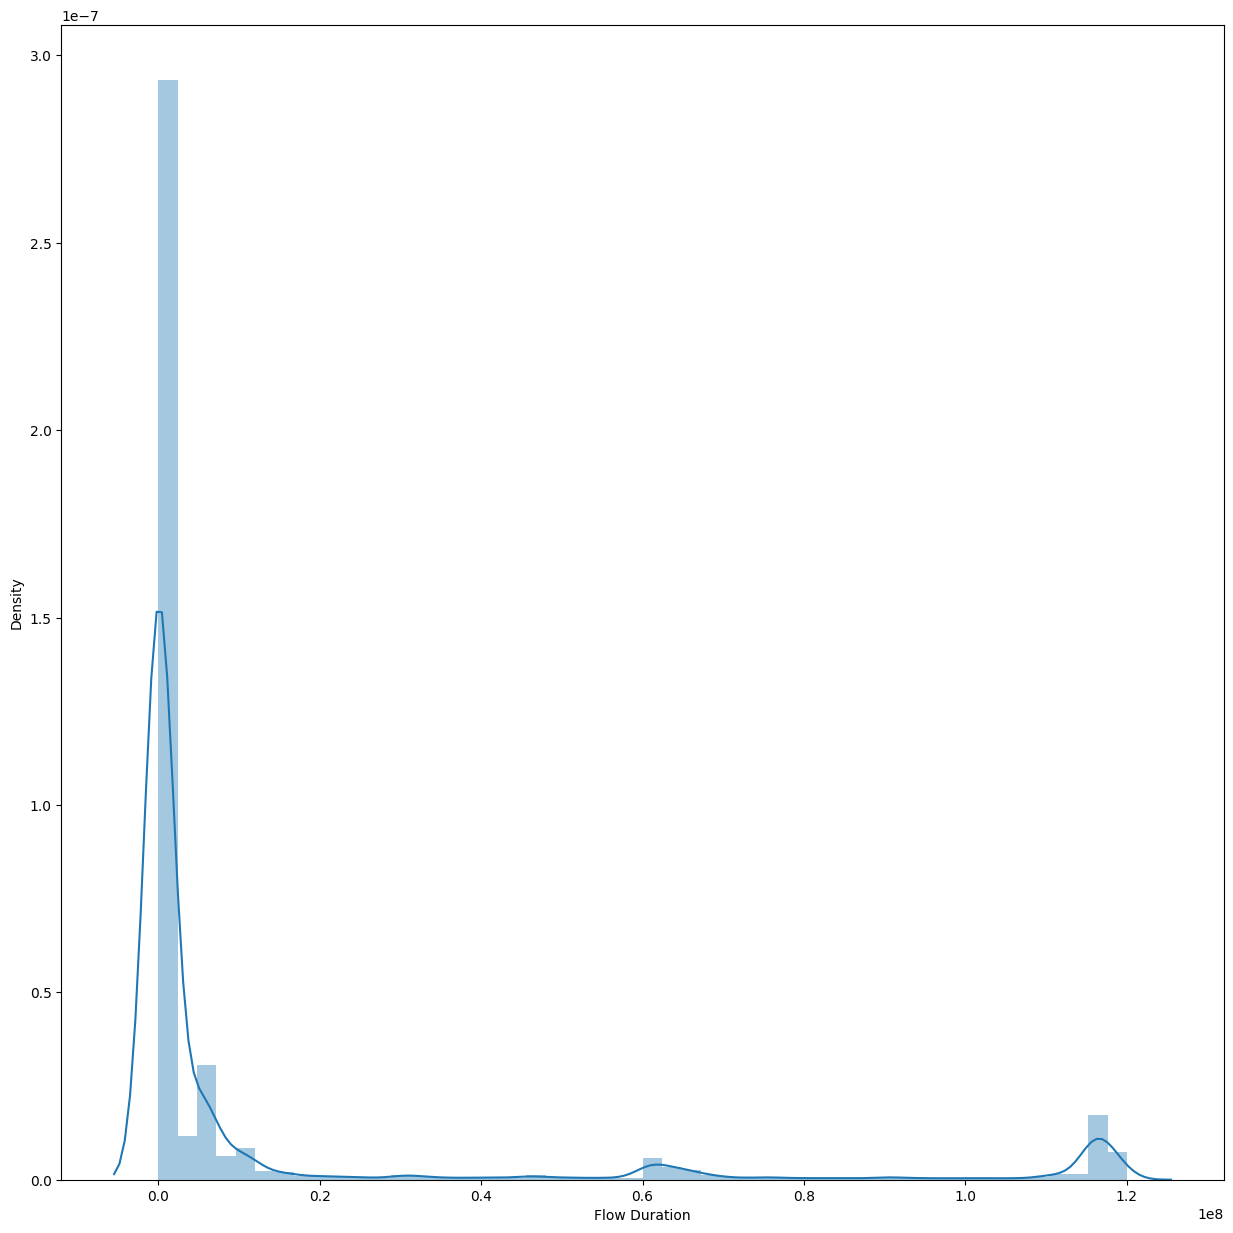

In [24]:
p = sns.distplot(a = df['Flow Duration'])
plt.show()

In [25]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [26]:
df.shape

(1824742, 85)

In [27]:
#UNDERSAMPLING
classes_to_keep = ['DDoS', 'Web Attack - Brute Force']

#limit to 1,00,000 records
classes_to_limit = ['BENIGN', 'Portscan']

df_keep = df[df['Label'].isin(classes_to_keep)]
df_limit = df[df['Label'].isin(classes_to_limit)].groupby("Label").head(50000)

df_ddos = df_keep[df_keep['Label'] == 'DDoS'].sample(n=35000, random_state=42)
df_web_attack = df_keep[df_keep['Label'] == 'Web Attack - Brute Force']  

result_df = pd.concat([df_ddos, df_web_attack, df_limit])
result_df = result_df.sample(frac=1, random_state=42).reset_index(drop=True) 

In [28]:
result_df.shape

(135073, 85)

In [29]:
result_df['Label'].value_counts()

Label
BENIGN                      50000
Portscan                    50000
DDoS                        35000
Web Attack - Brute Force       73
Name: count, dtype: int64

In [30]:
df_encoded = result_df.copy()

le = LabelEncoder()
df_encoded['Label'] = le.fit_transform(result_df['Label'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("LABEL MAPPING: \n", label_mapping)

print("\nENCODED DATAFRAME: \n", df_encoded.head())

LABEL MAPPING: 
 {'BENIGN': 0, 'DDoS': 1, 'Portscan': 2, 'Web Attack - Brute Force': 3}

ENCODED DATAFRAME: 
    Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0     55465        80         6        2835931                 7   
1     61014        53        17          50942                 1   
2     57042      5560         6             34                 1   
3     46130        53         6             98                 1   
4       123       123        17          16228                 1   

   Total Bwd packets  Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                  6                          20                       11595   
1                  1                          56                          88   
2                  1                           0                           0   
3                  1                           0                           0   
4                  1                          48                          48   



In [31]:
import joblib

encoder_file_path = 'label_encoder.pkl'
joblib.dump(le, encoder_file_path)

['label_encoder.pkl']

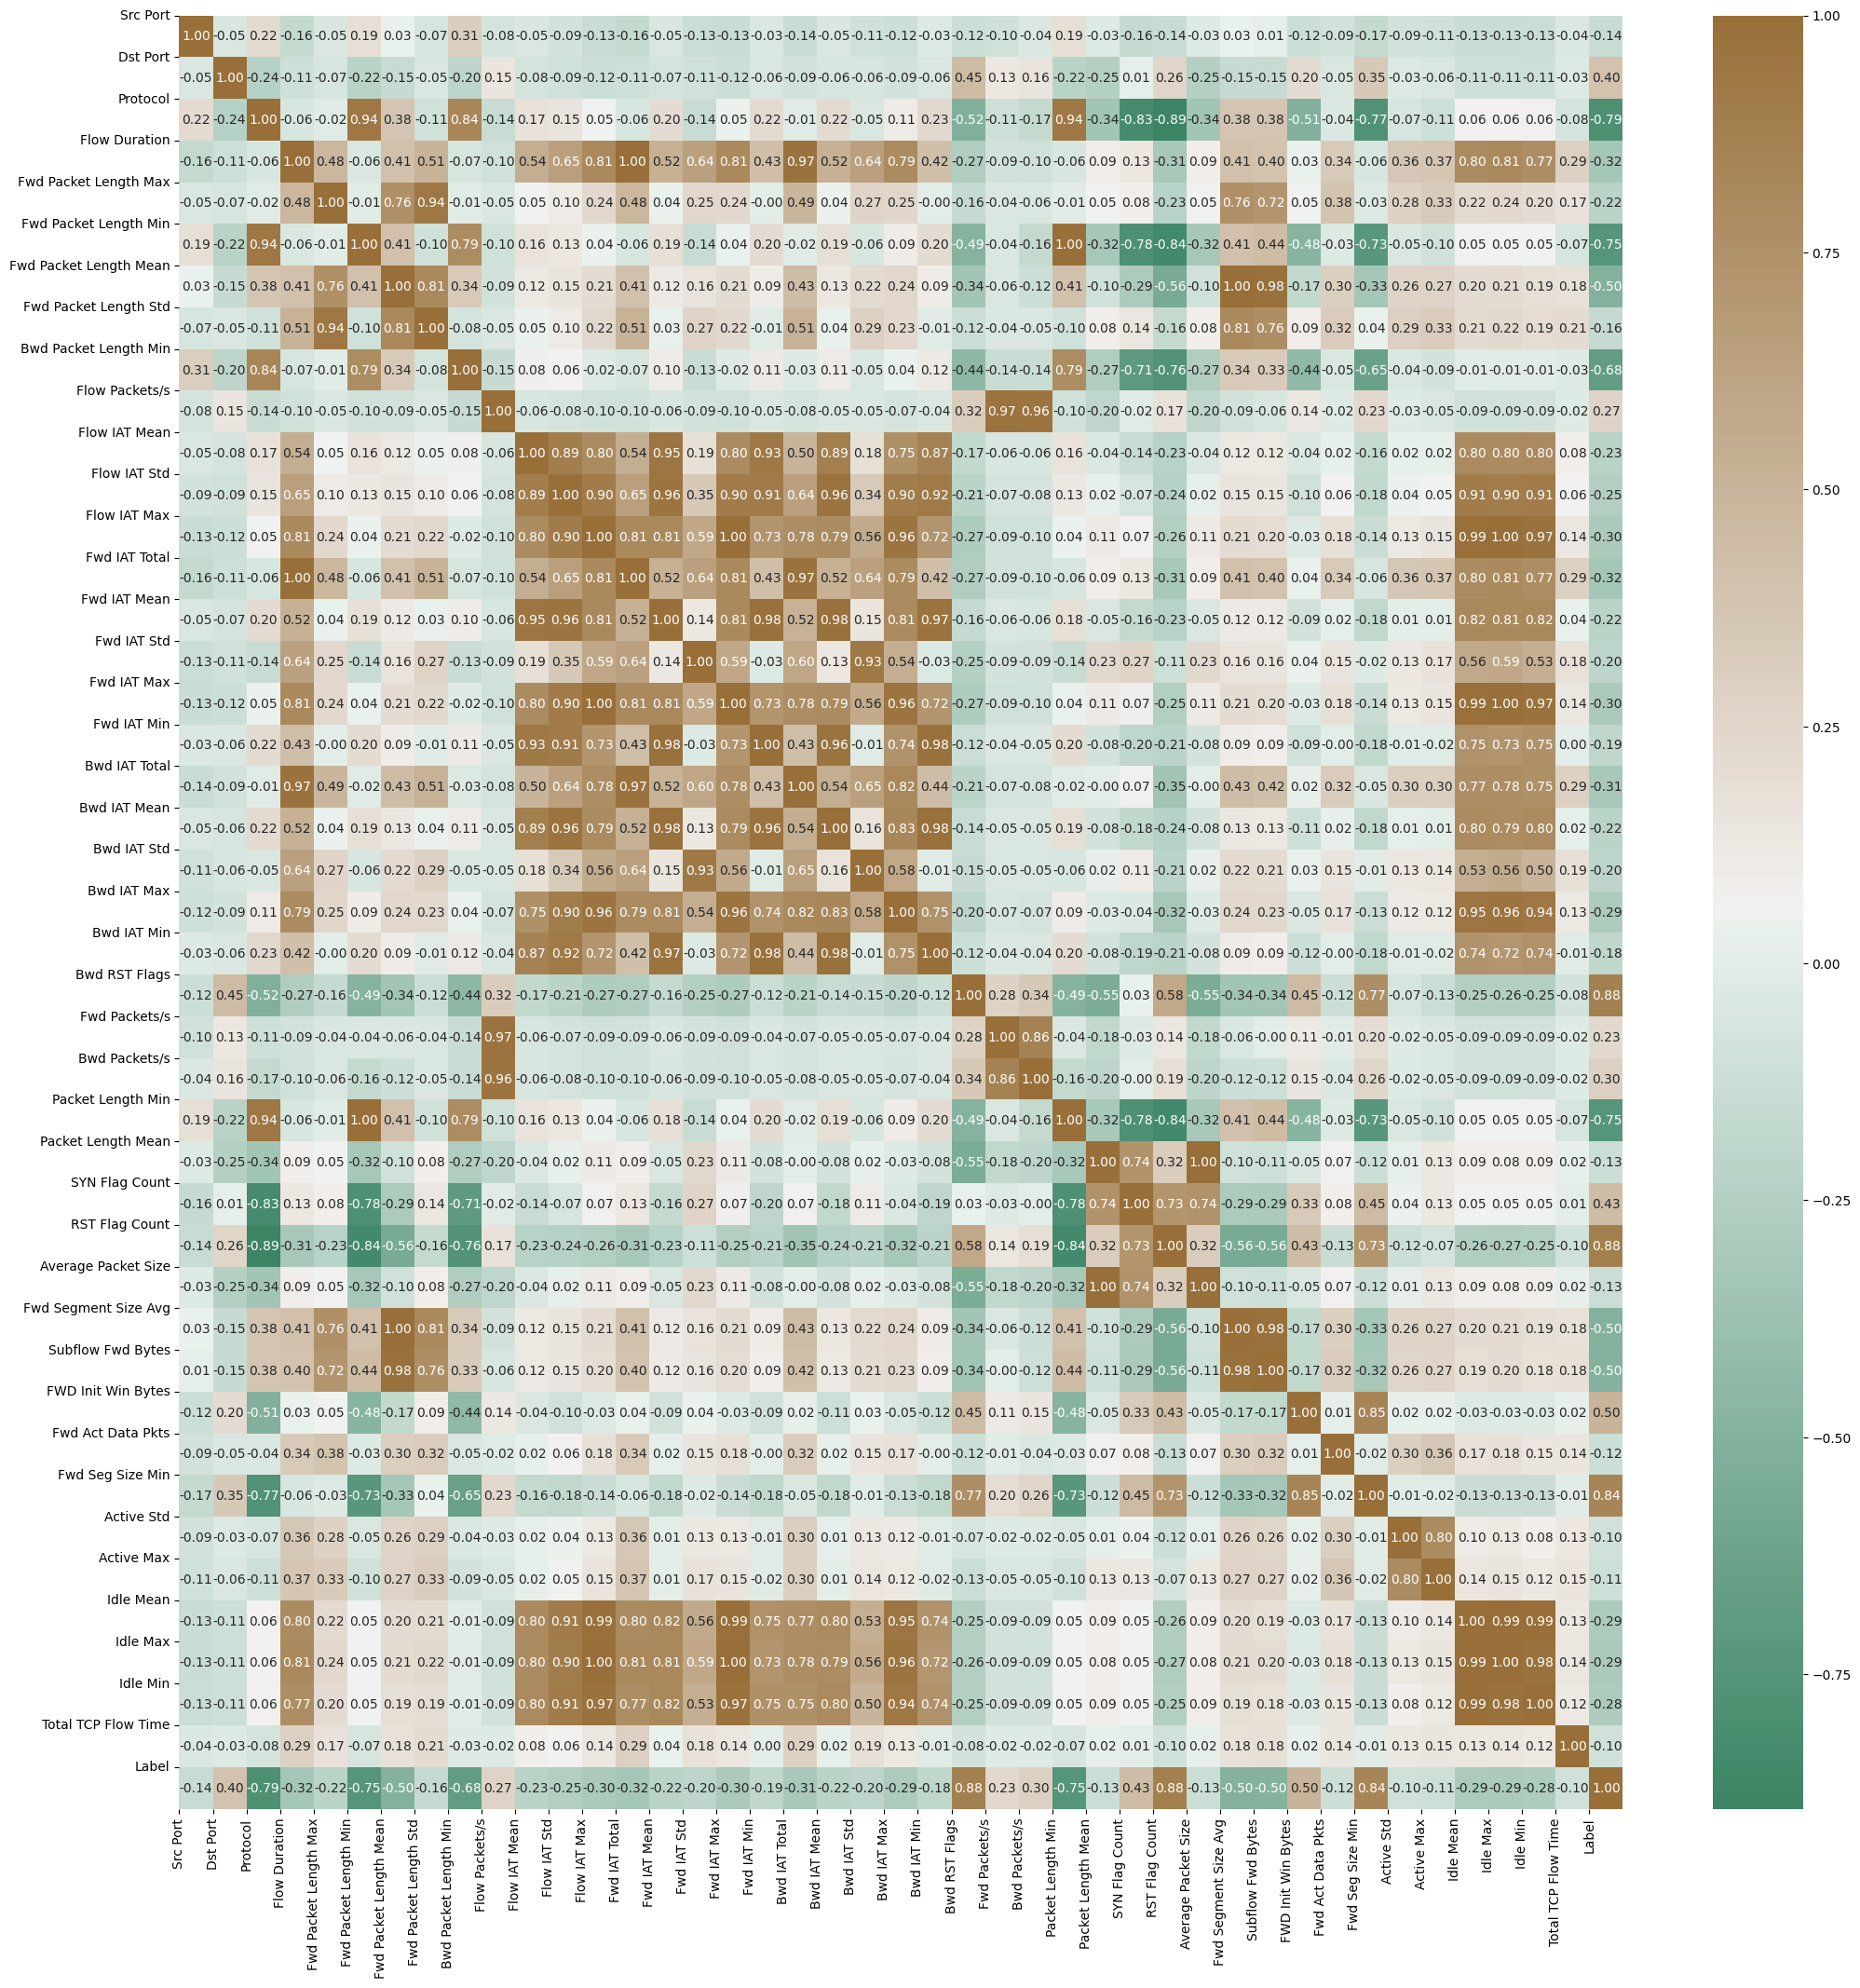

In [32]:
correlation_threshold = 0.1
corr = df_encoded.corr()

columns_to_include = corr.columns[abs(corr['Label']) >= correlation_threshold]
filtered_corr = corr.loc[columns_to_include, columns_to_include]

fig, ax = plt.subplots(figsize=(25, 25))
colormap = sns.diverging_palette(150, 50, as_cmap=True)
sns.heatmap(filtered_corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(filtered_corr.columns)), filtered_corr.columns)
plt.yticks(range(len(filtered_corr.columns)), filtered_corr.columns)
plt.show()

In [33]:
x = df_encoded.drop('Label', axis=1)
y = df_encoded['Label']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(108058, 84) (108058,)
(27015, 84) (27015,)


In [35]:
print("INFINITY VALUES IN X_TRAIN", np.any(np.isinf(x_train)))
print("NAN VALUES IN X_TRAIN", np.any(np.isnan(x_train)))

INFINITY VALUES IN X_TRAIN False
NAN VALUES IN X_TRAIN False


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':x.columns, 'Importance':feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(20)['Feature'].tolist()
df_top_features = df_encoded[top_features + ['Label']]
df_top_features.head()

,RST Flag Count,Fwd Packet Length Max,Total Length of Fwd Packet,Packet Length Max,Flow Bytes/s,Fwd Packet Length Mean,Packet Length Mean,Average Packet Size,Fwd Segment Size Avg,Bwd Packet Length Max,...,Bwd RST Flags,Subflow Fwd Bytes,Bwd Packet Length Mean,Fwd RST Flags,Packet Length Std,Bwd Segment Size Avg,FIN Flag Count,Flow IAT Max,Packet Length Variance,Label
0,1,20,20,5840,4095.656770,2.857143,893.461538,893.461538,2.857143,5840,...,0,1,1932.5,1,1732.745154,1932.5,1,2059314,3.002406e+06,1
1,0,56,56,88,2826.744140,56.000000,72.000000,72.000000,56.000000,88,...,0,28,88.0,0,22.627417,88.0,0,50942,5.120000e+02,0
2,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,1,0,0.0,0,0.000000,0.0,0,34,0.000000e+00,2
3,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,1,0,0.0,0,0.000000,0.0,0,98,0.000000e+00,2
4,0,48,48,48,5915.701257,48.000000,48.000000,48.000000,48.000000,48,...,0,24,48.0,0,0.000000,48.0,0,16228,0.000000e+00,0


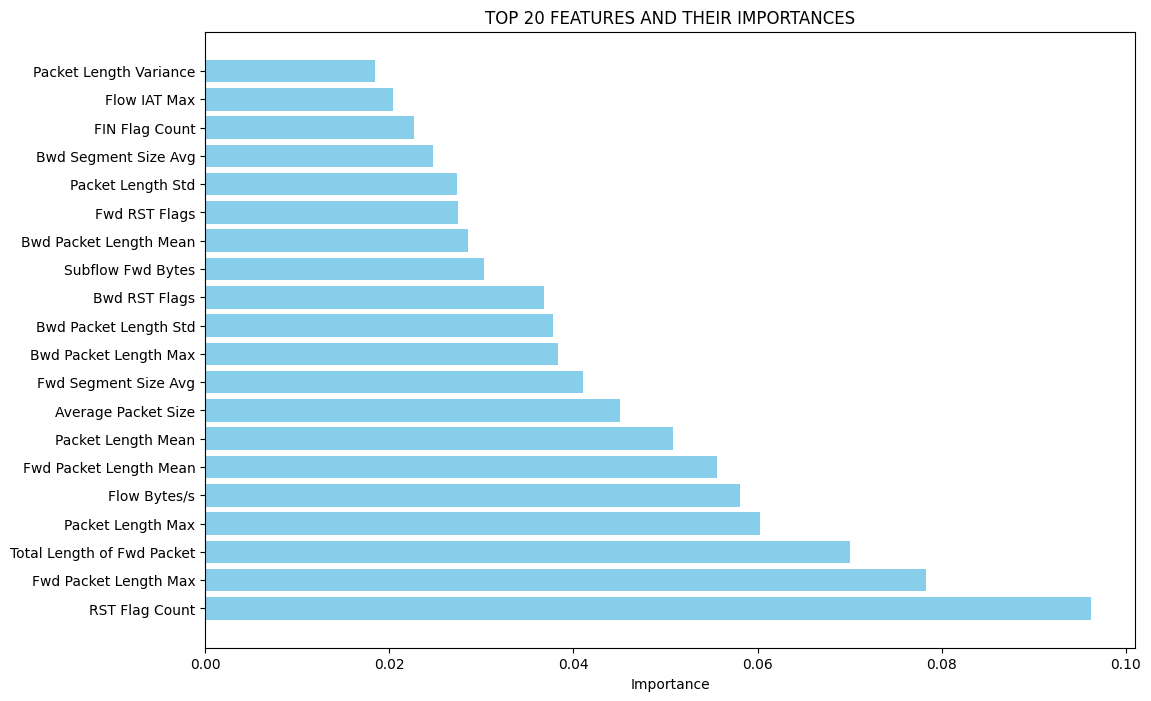

In [37]:
#top20 features and their importance
plt.figure(figsize=(12, 8))
plt.barh(top_features, feature_importance_df.head(20)['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('TOP 20 FEATURES AND THEIR IMPORTANCES')
plt.show()

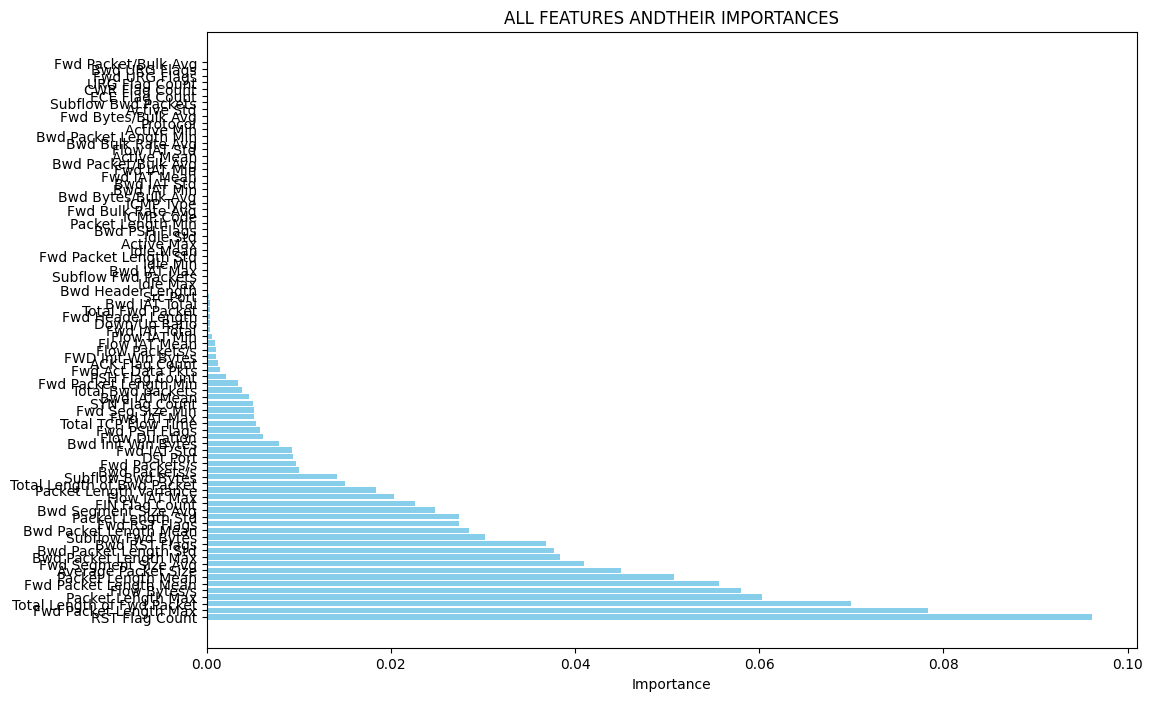

In [38]:
#SORT DATAFRAME BY IMPORTANCE IN DESCENDING ORDER
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('ALL FEATURES ANDTHEIR IMPORTANCES')
plt.show()

In [39]:
df_top_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135073 entries, 0 to 135072
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RST Flag Count              135073 non-null  int64  
 1   Fwd Packet Length Max       135073 non-null  int64  
 2   Total Length of Fwd Packet  135073 non-null  int64  
 3   Packet Length Max           135073 non-null  int64  
 4   Flow Bytes/s                135073 non-null  float64
 5   Fwd Packet Length Mean      135073 non-null  float64
 6   Packet Length Mean          135073 non-null  float64
 7   Average Packet Size         135073 non-null  float64
 8   Fwd Segment Size Avg        135073 non-null  float64
 9   Bwd Packet Length Max       135073 non-null  int64  
 10  Bwd Packet Length Std       135073 non-null  float64
 11  Bwd RST Flags               135073 non-null  int64  
 12  Subflow Fwd Bytes           135073 non-null  int64  
 13  Bwd Packet Len

In [40]:
print(f"Total duplicate rows in dataset: {df_top_features.duplicated().sum()}")

Total duplicate rows in dataset: 49943


In [41]:
df_top_features = df_top_features.drop_duplicates()

In [42]:
print(f"Total duplicate rows in dataset: {df_top_features.duplicated().sum()}")

Total duplicate rows in dataset: 0


In [43]:
x_top_features = df_top_features.drop('Label', axis=1)
y_top_features = df_top_features['Label']

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_top_features, y_top_features, 
    test_size=0.2,  # 20% test set
    random_state=42,  # Ensure reproducibility
    shuffle=True,  # Prevent order-based leakage
    stratify=y_top_features  # Maintain label distribution
)

In [45]:
overlap = set(map(tuple, x_train.values)) & set(map(tuple, x_test.values))
print(f"Overlapping samples in train & test BEFORE SMOTE: {len(overlap)}")

Overlapping samples in train & test BEFORE SMOTE: 0


In [46]:
print("Class distribution in y_train before SMOTE:\n", y_train.value_counts())

Class distribution in y_train before SMOTE:
 Label
0    39528
1    28000
2      518
3       58
Name: count, dtype: int64


In [47]:
#OVERSAMPLING
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE(sampling_strategy={3 : 5000}, random_state=42)  #Web Attack - Brute Force: 3
x_train, y_train = smote.fit_resample(x_train, y_train)  

#Convert Resampled Data Back to DataFrame (for visualization)
resampled_df = x_train.copy()
resampled_df['Label'] = y_train

resampled_df['Label'].value_counts()

Label
0    39528
1    28000
3     5000
2      518
Name: count, dtype: int64

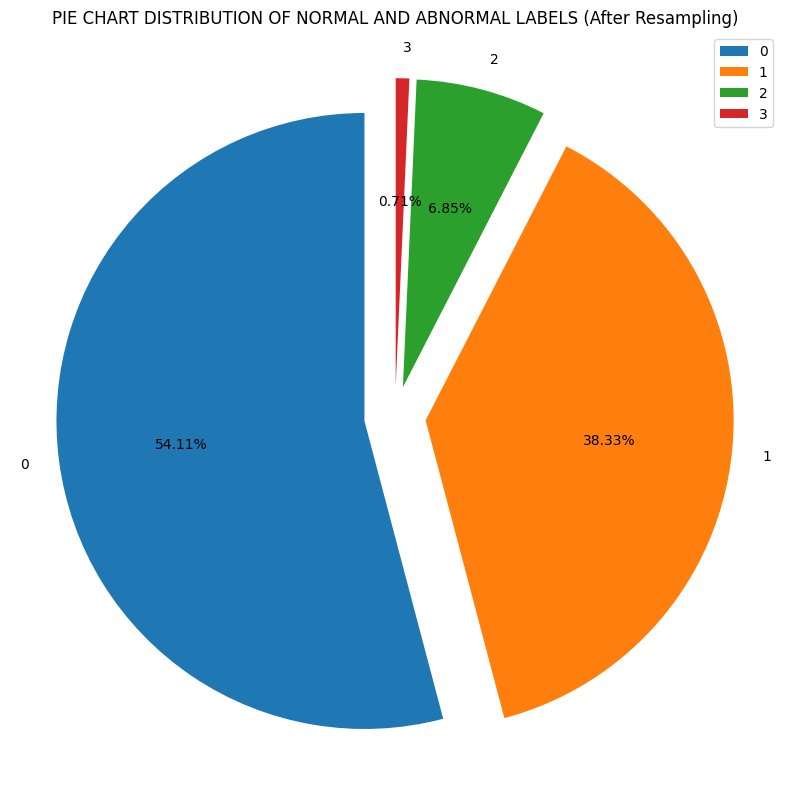

In [48]:
plt.figure(figsize=(10, 10))
labels = resampled_df['Label'].unique()
size = resampled_df['Label'].value_counts()
explode = (0.1,) * len(labels)  

plt.pie(size, labels=labels, autopct='%0.2f%%', explode=explode, startangle=90)
plt.title("PIE CHART DISTRIBUTION OF NORMAL AND ABNORMAL LABELS (After Resampling)")
plt.legend(labels, loc="best")
plt.show()

In [49]:
print("INFINITY VALUES IN X_TRAIN: ", np.any(np.isinf(x_train)))
print("NAN VALUES IN X_TRAIN: ", np.any(np.isnan(x_train)))

INFINITY VALUES IN X_TRAIN:  False
NAN VALUES IN X_TRAIN:  False


In [50]:
overlap = set(map(tuple, x_train.values)) & set(map(tuple, x_test.values))
print(f"Overlapping samples in train & test: {len(overlap)}")

Overlapping samples in train & test: 0


In [81]:
duplicates = x_test.duplicated().sum()
print(f"Total duplicate samples in dataset: {duplicates}")

Total duplicate samples in dataset: 0


In [82]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73046 entries, 0 to 73045
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RST Flag Count              73046 non-null  int64  
 1   Fwd Packet Length Max       73046 non-null  int64  
 2   Total Length of Fwd Packet  73046 non-null  int64  
 3   Packet Length Max           73046 non-null  int64  
 4   Flow Bytes/s                73046 non-null  float64
 5   Fwd Packet Length Mean      73046 non-null  float64
 6   Packet Length Mean          73046 non-null  float64
 7   Average Packet Size         73046 non-null  float64
 8   Fwd Segment Size Avg        73046 non-null  float64
 9   Bwd Packet Length Max       73046 non-null  int64  
 10  Bwd Packet Length Std       73046 non-null  float64
 11  Bwd RST Flags               73046 non-null  int64  
 12  Subflow Fwd Bytes           73046 non-null  int64  
 13  Bwd Packet Length Mean      730

In [83]:
x_top_features.to_csv('x_top_features.csv', index=False)
y_top_features.to_csv('y_top_features.csv', index=False)

In [84]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [85]:
def print_all_metrics(algo, name):
    y_train_log = algo.predict(x_train)
    y_test_log = algo.predict(x_test)

    acc_train_log = metrics.accuracy_score(y_train, y_train_log)
    acc_test_log = metrics.accuracy_score(y_test, y_test_log)
    print(f"{name}: ACCURACY ON TRAINING DATA: {acc_train_log:.3f}")
    print(f"{name}: ACCURACY ON TEST DATA: {acc_test_log:.3f}")
    print("\n")
    
    f1score_train_log = metrics.f1_score(y_train, y_train_log, average='macro')
    f1score_test_log = metrics.f1_score(y_test, y_test_log, average='macro')
    print(f"{name}: F1SCORE ON TRAINING DATA: {f1score_train_log:.3f}")
    print(f"{name}: F1SCORE ON TEST DATA: {f1score_test_log:.3f}")
    print("\n")
    
    recall_score_train_log = metrics.recall_score(y_train, y_train_log, average='macro')
    recall_score_test_log = metrics.recall_score(y_test, y_test_log, average='macro')
    print(f"{name}: RECALL SCORE ON TRAINING DATA: {recall_score_train_log:.3f}")
    print(f"{name}: RECALL SCORE ON TEST DATA: {recall_score_test_log:.3f}")
    print("\n")
    
    precision_score_train_log = metrics.precision_score(y_train, y_train_log, average='macro')
    precision_score_test_log = metrics.precision_score(y_test, y_test_log, average='macro')
    print(f"{name}: PRECSION SCORE ON TRAINING DATA: {precision_score_train_log:.3f}")
    print(f"{name}: PRECSION SCORE ON TEST DATA: {precision_score_test_log:.3f}")
    print("\n")
    
    print("\n\nCLASSIFICATION REPORT\n")
    print(metrics.classification_report(y_test, y_test_log))
    print("\n\n")
    

In [90]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.05)
dt.fit(x_train, y_train)
print_all_metrics(dt, 'DecisionTreeClassifier')

joblib.dump(dt, 'DecisionTreeClassifier.joblib')

DecisionTreeClassifier: ACCURACY ON TRAINING DATA: 0.990
DecisionTreeClassifier: ACCURACY ON TEST DATA: 0.990


DecisionTreeClassifier: F1SCORE ON TRAINING DATA: 0.743
DecisionTreeClassifier: F1SCORE ON TEST DATA: 0.585


DecisionTreeClassifier: RECALL SCORE ON TRAINING DATA: 0.749
DecisionTreeClassifier: RECALL SCORE ON TEST DATA: 0.749


DecisionTreeClassifier: PRECSION SCORE ON TRAINING DATA: 0.737
DecisionTreeClassifier: PRECSION SCORE ON TEST DATA: 0.550




CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9882
           1       1.00      1.00      1.00      7000
           2       0.00      0.00      0.00       129
           3       0.21      1.00      0.35        15

    accuracy                           0.99     17026
   macro avg       0.55      0.75      0.58     17026
weighted avg       0.98      0.99      0.99     17026






['DecisionTreeClassifier.joblib']

In [57]:
'''
#SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train, y_train)
print_all_metrics(svm_model, 'SVM')
'''

"\n#SVM\nfrom sklearn.svm import SVC\n\nsvm_model = SVC(kernel='linear', C=1.0)\nsvm_model.fit(x_train, y_train)\nprint_all_metrics(svm_model, 'SVM')\n"

In [91]:
#RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
     n_estimators=30,       # Fewer trees = less overfitting
    max_depth=4,           # Limit tree depth to generalize better
    min_samples_split=50,  # Prevent deep branching
    min_samples_leaf=25,   # Ensure leaves have enough samples
    max_features='sqrt',   # Select a random subset of features per tree
    max_samples=0.5,       # Each tree sees only 50% of the data
    bootstrap=True,        
    random_state=42
)
rf.fit(x_train, y_train)
print_all_metrics(rf, 'RandomForestClassifier')

joblib.dump(rf, 'RandomForestClassifier.joblib')

RandomForestClassifier: ACCURACY ON TRAINING DATA: 0.998
RandomForestClassifier: ACCURACY ON TEST DATA: 0.998


RandomForestClassifier: F1SCORE ON TRAINING DATA: 0.966
RandomForestClassifier: F1SCORE ON TEST DATA: 0.965


RandomForestClassifier: RECALL SCORE ON TRAINING DATA: 0.942
RandomForestClassifier: RECALL SCORE ON TEST DATA: 0.940


RandomForestClassifier: PRECSION SCORE ON TRAINING DATA: 0.999
RandomForestClassifier: PRECSION SCORE ON TEST DATA: 0.999




CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9882
           1       1.00      1.00      1.00      7000
           2       1.00      0.76      0.86       129
           3       1.00      1.00      1.00        15

    accuracy                           1.00     17026
   macro avg       1.00      0.94      0.97     17026
weighted avg       1.00      1.00      1.00     17026






['RandomForestClassifier.joblib']

In [59]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print_all_metrics(knn, 'KneighborsClassifier')

joblib.dump(knn, 'KneighborsClassifier.joblib')

KneighborsClassifier: ACCURACY ON TRAINING DATA: 0.998
KneighborsClassifier: ACCURACY ON TEST DATA: 0.998


KneighborsClassifier: F1SCORE ON TRAINING DATA: 0.985
KneighborsClassifier: F1SCORE ON TEST DATA: 0.943


KneighborsClassifier: RECALL SCORE ON TRAINING DATA: 0.981
KneighborsClassifier: RECALL SCORE ON TEST DATA: 0.972


KneighborsClassifier: PRECSION SCORE ON TRAINING DATA: 0.989
KneighborsClassifier: PRECSION SCORE ON TEST DATA: 0.922




CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9882
           1       1.00      1.00      1.00      7000
           2       0.94      0.89      0.92       129
           3       0.75      1.00      0.86        15

    accuracy                           1.00     17026
   macro avg       0.92      0.97      0.94     17026
weighted avg       1.00      1.00      1.00     17026






['KneighborsClassifier.joblib']

In [92]:
#LOGISTICS REGRESS
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state = 42)
lg.fit(x_train, y_train)
print_all_metrics(lg, 'LogisticRegression')

joblib.dump(lg, 'LogisticRegression.joblib')

LogisticRegression: ACCURACY ON TRAINING DATA: 0.988
LogisticRegression: ACCURACY ON TEST DATA: 0.988


LogisticRegression: F1SCORE ON TRAINING DATA: 0.747
LogisticRegression: F1SCORE ON TEST DATA: 0.692


LogisticRegression: RECALL SCORE ON TRAINING DATA: 0.747
LogisticRegression: RECALL SCORE ON TEST DATA: 0.750


LogisticRegression: PRECSION SCORE ON TRAINING DATA: 0.753
LogisticRegression: PRECSION SCORE ON TEST DATA: 0.662




CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9882
           1       0.99      1.00      1.00      7000
           2       0.04      0.01      0.01       129
           3       0.62      1.00      0.77        15

    accuracy                           0.99     17026
   macro avg       0.66      0.75      0.69     17026
weighted avg       0.98      0.99      0.99     17026






['LogisticRegression.joblib']

In [93]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

nb = GaussianNB()
nb.fit(x_train, y_train)
print_all_metrics(nb, 'Naive Bayes')

joblib.dump(nb, 'GaussianNB.joblib')

Naive Bayes: ACCURACY ON TRAINING DATA: 0.988
Naive Bayes: ACCURACY ON TEST DATA: 0.987


Naive Bayes: F1SCORE ON TRAINING DATA: 0.767
Naive Bayes: F1SCORE ON TEST DATA: 0.695


Naive Bayes: RECALL SCORE ON TRAINING DATA: 0.761
Naive Bayes: RECALL SCORE ON TEST DATA: 0.755


Naive Bayes: PRECSION SCORE ON TRAINING DATA: 0.783
Naive Bayes: PRECSION SCORE ON TEST DATA: 0.664




CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9882
           1       0.99      0.99      0.99      7000
           2       0.07      0.03      0.04       129
           3       0.60      1.00      0.75        15

    accuracy                           0.99     17026
   macro avg       0.66      0.76      0.69     17026
weighted avg       0.98      0.99      0.99     17026






['GaussianNB.joblib']

In [63]:
'''!pip install catboost'''

'!pip install catboost'

In [96]:
#CATBOOST CLASSIFIER
import catboost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=10, l2_leaf_reg=5, learning_rate=0.05, depth=6)
catboost_model.fit(x_train, y_train)
print_all_metrics(catboost_model, 'CatBoostClassifier')

joblib.dump(catboost_model, 'CatBoostClassifier.joblib')

0:	learn: 1.2420258	total: 23.1ms	remaining: 208ms
1:	learn: 1.1235836	total: 44.6ms	remaining: 179ms
2:	learn: 1.0239663	total: 67.1ms	remaining: 157ms
3:	learn: 0.9380799	total: 91.6ms	remaining: 137ms
4:	learn: 0.8633488	total: 116ms	remaining: 116ms
5:	learn: 0.7973745	total: 137ms	remaining: 91ms
6:	learn: 0.7386787	total: 156ms	remaining: 67.1ms
7:	learn: 0.6859246	total: 175ms	remaining: 43.8ms
8:	learn: 0.6384296	total: 200ms	remaining: 22.2ms
9:	learn: 0.5954545	total: 221ms	remaining: 0us
CatBoostClassifier: ACCURACY ON TRAINING DATA: 0.999
CatBoostClassifier: ACCURACY ON TEST DATA: 0.999


CatBoostClassifier: F1SCORE ON TRAINING DATA: 0.976
CatBoostClassifier: F1SCORE ON TEST DATA: 0.973


CatBoostClassifier: RECALL SCORE ON TRAINING DATA: 0.963
CatBoostClassifier: RECALL SCORE ON TEST DATA: 0.957


CatBoostClassifier: PRECSION SCORE ON TRAINING DATA: 0.990
CatBoostClassifier: PRECSION SCORE ON TEST DATA: 0.993




CLASSIFICATION REPORT

              precision    recall  f1

['CatBoostClassifier.joblib']

In [119]:
#HYBRID MODEL
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier

meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

#BASE MODELS
lg_model = LogisticRegression(C=0.1, penalty='l2') 
dt_model = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.05, max_depth=3, min_samples_split=10,class_weight='balanced')
knn_model = KNeighborsClassifier(n_neighbors=3)
catboost_model = CatBoostClassifiercatboost_model = CatBoostClassifier(
    iterations=200,         # Increase iterations  
    learning_rate=0.01,     # Reduce learning rate  
    depth=4,  
    early_stopping_rounds=50, random_strength=1  # Prevent overfitting  
)

#STACKING ENSEMBLE MODEL
stacked_model = StackingClassifier(
    estimators = [('DecisionTree', dt_model), ('LogisticRegression', lg_model), ('KNN', knn_model), ('CatBoostClassifier', catboost_model)],
    final_estimator = meta_model,
    cv = 5
)
stacked_model.fit(x_train, y_train)
print_all_metrics(stacked_model, 'Stacking Ensemble')

joblib.dump(stacked_model, 'StackingEnsemble.joblib')

0:	learn: 1.3569312	total: 12.6ms	remaining: 2.51s
1:	learn: 1.3285369	total: 26.7ms	remaining: 2.65s
2:	learn: 1.3012209	total: 39.8ms	remaining: 2.61s
3:	learn: 1.2750884	total: 51ms	remaining: 2.5s
4:	learn: 1.2496777	total: 62.8ms	remaining: 2.45s
5:	learn: 1.2251410	total: 74.2ms	remaining: 2.4s
6:	learn: 1.2016868	total: 85.9ms	remaining: 2.37s
7:	learn: 1.1789103	total: 98.6ms	remaining: 2.37s
8:	learn: 1.1567925	total: 111ms	remaining: 2.36s
9:	learn: 1.1353411	total: 123ms	remaining: 2.34s
10:	learn: 1.1148514	total: 134ms	remaining: 2.31s
11:	learn: 1.0946801	total: 147ms	remaining: 2.3s
12:	learn: 1.0751501	total: 159ms	remaining: 2.29s
13:	learn: 1.0561765	total: 169ms	remaining: 2.25s
14:	learn: 1.0377499	total: 182ms	remaining: 2.25s
15:	learn: 1.0198422	total: 194ms	remaining: 2.23s
16:	learn: 1.0024673	total: 206ms	remaining: 2.22s
17:	learn: 0.9855415	total: 219ms	remaining: 2.21s
18:	learn: 0.9690429	total: 232ms	remaining: 2.21s
19:	learn: 0.9529680	total: 246ms	rema

['StackingEnsemble.joblib']

In [114]:
x_train.columns

Index(['RST Flag Count', 'Fwd Packet Length Max', 'Total Length of Fwd Packet',
       'Packet Length Max', 'Flow Bytes/s', 'Fwd Packet Length Mean',
       'Packet Length Mean', 'Average Packet Size', 'Fwd Segment Size Avg',
       'Bwd Packet Length Max', 'Bwd Packet Length Std', 'Bwd RST Flags',
       'Subflow Fwd Bytes', 'Bwd Packet Length Mean', 'Fwd RST Flags',
       'Packet Length Std', 'Bwd Segment Size Avg', 'FIN Flag Count',
       'Flow IAT Max', 'Packet Length Variance'],
      dtype='object')

In [120]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels (One-vs-Rest approach)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust classes based on your dataset

y_scores = stacked_model.predict_proba(x_test)  # Get probability estimates for each class

pr_auc_per_class = []
for i in range(y_scores.shape[1]):  # Iterate over each class
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    pr_auc = auc(recall, precision)
    pr_auc_per_class.append(pr_auc)
    print(f"Class {i}: Precision-Recall AUC = {pr_auc:.4f}")

# Compute the macro-average PR-AUC
macro_pr_auc = sum(pr_auc_per_class) / len(pr_auc_per_class)
print(f"Macro Average Precision-Recall AUC: {macro_pr_auc:.4f}")

Class 0: Precision-Recall AUC = 0.9999
Class 1: Precision-Recall AUC = 1.0000
Class 2: Precision-Recall AUC = 0.9947
Class 3: Precision-Recall AUC = 1.0000
Macro Average Precision-Recall AUC: 0.9987


In [121]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(stacked_model, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.4f}")

0:	learn: 1.3570602	total: 9.85ms	remaining: 1.96s
1:	learn: 1.3286827	total: 20.2ms	remaining: 2s
2:	learn: 1.3013817	total: 30.5ms	remaining: 2s
3:	learn: 1.2753048	total: 39.8ms	remaining: 1.95s
4:	learn: 1.2498828	total: 49.6ms	remaining: 1.93s
5:	learn: 1.2253726	total: 59.4ms	remaining: 1.92s
6:	learn: 1.2021220	total: 68.9ms	remaining: 1.9s
7:	learn: 1.1795536	total: 78.9ms	remaining: 1.89s
8:	learn: 1.1574302	total: 88.4ms	remaining: 1.88s
9:	learn: 1.1359748	total: 98.5ms	remaining: 1.87s
10:	learn: 1.1154927	total: 108ms	remaining: 1.85s
11:	learn: 1.0953137	total: 118ms	remaining: 1.85s
12:	learn: 1.0757810	total: 129ms	remaining: 1.86s
13:	learn: 1.0567997	total: 141ms	remaining: 1.87s
14:	learn: 1.0383690	total: 157ms	remaining: 1.93s
15:	learn: 1.0204555	total: 172ms	remaining: 1.97s
16:	learn: 1.0030797	total: 187ms	remaining: 2.02s
17:	learn: 0.9861477	total: 202ms	remaining: 2.04s
18:	learn: 0.9697234	total: 217ms	remaining: 2.07s
19:	learn: 0.9536417	total: 231ms	rema

In [68]:
#
loaded_model = joblib.load('StackingEnsemble.joblib')

In [69]:
#SAVING DATA FOR TESTING
print(x_top_features.iloc[0])
print("\n\nOUTPUT: ", y_top_features.iloc[0])

RST Flag Count                1.000000e+00
Fwd Packet Length Max         2.000000e+01
Total Length of Fwd Packet    2.000000e+01
Packet Length Max             5.840000e+03
Flow Bytes/s                  4.095657e+03
Fwd Packet Length Mean        2.857143e+00
Packet Length Mean            8.934615e+02
Average Packet Size           8.934615e+02
Fwd Segment Size Avg          2.857143e+00
Bwd Packet Length Max         5.840000e+03
Bwd Packet Length Std         2.190830e+03
Bwd RST Flags                 0.000000e+00
Subflow Fwd Bytes             1.000000e+00
Bwd Packet Length Mean        1.932500e+03
Fwd RST Flags                 1.000000e+00
Packet Length Std             1.732745e+03
Bwd Segment Size Avg          1.932500e+03
FIN Flag Count                1.000000e+00
Flow IAT Max                  2.059314e+06
Packet Length Variance        3.002406e+06
Name: 0, dtype: float64


OUTPUT:  1


In [70]:
#MAKE PREDICTIONS
first_row_df = x_top_features.head(1)
prediction = loaded_model.predict(first_row_df)

print(f"PREDICTION CLASS: {prediction[0]}")

PREDICTION CLASS: 1


In [71]:
print(x_top_features.iloc[1])
print("\n\nOUTPUT: ", y_top_features.iloc[1])

RST Flag Count                    0.000000
Fwd Packet Length Max            56.000000
Total Length of Fwd Packet       56.000000
Packet Length Max                88.000000
Flow Bytes/s                   2826.744140
Fwd Packet Length Mean           56.000000
Packet Length Mean               72.000000
Average Packet Size              72.000000
Fwd Segment Size Avg             56.000000
Bwd Packet Length Max            88.000000
Bwd Packet Length Std             0.000000
Bwd RST Flags                     0.000000
Subflow Fwd Bytes                28.000000
Bwd Packet Length Mean           88.000000
Fwd RST Flags                     0.000000
Packet Length Std                22.627417
Bwd Segment Size Avg             88.000000
FIN Flag Count                    0.000000
Flow IAT Max                  50942.000000
Packet Length Variance          512.000000
Name: 1, dtype: float64


OUTPUT:  0


In [72]:
#MAKE PREDICTIONS
first_row_df = x_top_features.head(2).tail(1)
prediction = loaded_model.predict(first_row_df)

print(f"PREDICTION CLASS: {prediction[0]}")

PREDICTION CLASS: 0


In [73]:
first_row_df.to_csv('first_row_df.csv')

In [74]:
first_row_df

,RST Flag Count,Fwd Packet Length Max,Total Length of Fwd Packet,Packet Length Max,Flow Bytes/s,Fwd Packet Length Mean,Packet Length Mean,Average Packet Size,Fwd Segment Size Avg,Bwd Packet Length Max,Bwd Packet Length Std,Bwd RST Flags,Subflow Fwd Bytes,Bwd Packet Length Mean,Fwd RST Flags,Packet Length Std,Bwd Segment Size Avg,FIN Flag Count,Flow IAT Max,Packet Length Variance
1,0,56,56,88,2826.74414,56.0,72.0,72.0,56.0,88,0.0,0,28,88.0,0,22.627417,88.0,0,50942,512.0


In [75]:
#DATAFRAME WITH FIRST ROW
first_row_df = x_top_features.head(10)
first_row_df.to_csv('first_x_10_row_df.csv', index=False)
first_row_df = y_top_features.head(10)
first_row_df.to_csv('first_y_10_row_df.csv', index=False)

In [76]:
#DATAFRAME WITH FIRST ROW
first_row_df = x_top_features.head(-10)
first_row_df.to_csv('first_x_10_row_df1.csv', index=False)
first_row_df = y_top_features.head(-10)
first_row_df.to_csv('first_y_10_row_df1.csv', index=False)

In [77]:
#ASSUMING x_top_features AND y_top_features ARE DFS
middle_rows_x = x_top_features.loc[15:24]#ROWS 16 TO 25(10 ROWS)
middle_rows_y = y_top_features.loc[15:24]

middle_rows_x.to_csv('middle_x_10_row_df1.csv', index=False)
middle_rows_y.to_csv('middle_y_10_row_df1.csv', index=False)

In [78]:
#NEW DATAFRAME WITH FIRST ROW
first_row_df = x_top_features.head(1)
first_row_df.to_csv('first_x_row_df.csv', index=False)

first_row_df = y_top_features.head(1)
first_row_df.to_csv('first_y_row_df.csv', index=False)

In [79]:
first_row_df = x_top_features.tail(10)
first_row_df.to_csv('last_x_10_row_df.csv', index=False)

first_row_df = y_top_features.tail(10)
first_row_df.to_csv('last_y_10_row_df.csv', index=False)

In [80]:
#LIVE TESTING

model_filename = 'StackingEnsemble.joblib'
loaded_model = joblib.load(model_filename)

feature_order = [
    'Fwd Packet Length Mean',
    ''
]

#USER_INPUT 
def make_prediction():
    user_input = {}

    for col in feature_order:
        value = input(f"ENTER VALUE FOR {col}: ")
        user_input[col] = float(value) if 'float' in str(df.dtypes[col] else int(value))

    user_data = pd.DataFrame([user_input])
    prediction = loaded_model.predict(user_data)

    print(f"PREDICTED CLASS IS: {prediction[0]}")

make_prediction()

SyntaxError: expected 'else' after 'if' expression (1115417165.py, line 17)